<div style="text-align: center; background-color:rgb(58, 12, 225); padding: 10px; border-radius: 10px;">
    <span style="color: white; font-size: 50px; font-weight: bold;">Data Collection, Exploration, and Preprocessing</span>
</div>

# Goals <a class="anchor" id="Goals"></a>

This notebook presents an exploration of car sales data spanning 2022-2023. The objectives of this analysis are:
# 1️⃣ Data Collection
# 2️⃣ Data Cleaning
# 3️⃣ Data Analysis
# 4️⃣ Data Visualization


* Gain an understanding of the dataset and its organization
* Clean and prepare the data for thorough analysis
* Develop inquiries based on observable trends within the dataset
* Investigate and analyze the data to reveal key patterns, correlations, and insights
* Utilize visualizations to emphasize sales trends by brand, model,e and ovr time

#

Import the Library To Using it 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp

# **Data Collection**

### Data <a class="anchor" id="Data"></a>

The data for this project was downloaded from Kaggle:

[https://www.kaggle.com/datasets/missionjee/car-sales-report](https://www.kaggle.com/datasets/missionjee/car-sales-report)

In [2]:
CarSales = pd.read_csv('../../Car Sales.xlsx - car_data (1).csv', index_col=0)
CarSales.head()

,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
Car_id,,,,,,,,,,,,,,,
C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


the dataset talking about historical car sales with relevant features such as dates, sales amount and the target column of our analysis is the  " price($) " of the car .              
our goal is to predict the price of a car based on other features.


# **Data Exploration Analysis (EDA):**

### First: check at data types and missing valuesfor each column 

In [3]:
print(CarSales.info())  

<class 'pandas.core.frame.DataFrame'>
Index: 23906 entries, C_CND_000001 to C_CND_023906
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           23906 non-null  object
 1   Customer Name  23905 non-null  object
 2   Gender         23906 non-null  object
 3   Annual Income  23906 non-null  int64 
 4   Dealer_Name    23906 non-null  object
 5   Company        23906 non-null  object
 6   Model          23906 non-null  object
 7   Engine         23906 non-null  object
 8   Transmission   23906 non-null  object
 9   Color          23906 non-null  object
 10  Price ($)      23906 non-null  int64 
 11  Dealer_No      23906 non-null  object
 12  Body Style     23906 non-null  object
 13  Phone          23906 non-null  int64 
 14  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(12)
memory usage: 2.9+ MB
None


we have to be cast the column Data to==> data type 

In [4]:
CarSales.shape # the shape of dataframe has a 23906 rows and 15 columns

(23906, 15)

### Second: Count missing values in each column


In [5]:
print(CarSales.isnull().sum()) 

Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64


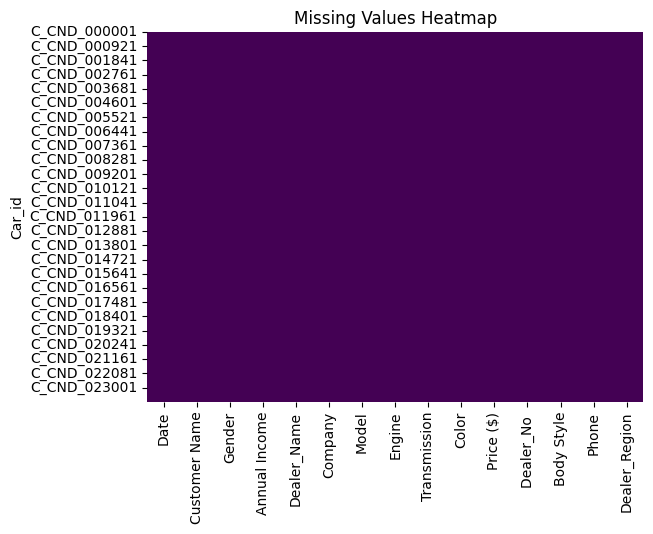

In [6]:
sns.heatmap(CarSales.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

we found a one column has a null values 

In [7]:
print(CarSales.describe())  # Summary of numerical columns

       Annual Income     Price ($)         Phone
count   2.390600e+04  23906.000000  2.390600e+04
mean    8.308403e+05  28090.247846  7.497741e+06
std     7.200064e+05  14788.687608  8.674920e+05
min     1.008000e+04   1200.000000  6.000101e+06
25%     3.860000e+05  18001.000000  6.746495e+06
50%     7.350000e+05  23000.000000  7.496198e+06
75%     1.175750e+06  34000.000000  8.248146e+06
max     1.120000e+07  85800.000000  8.999579e+06


### Three: Detect Outliers

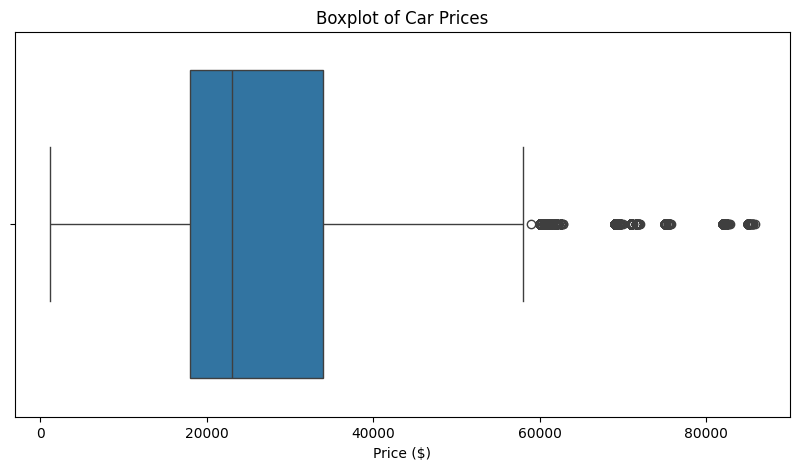

'Insights:\n- The majority of car prices range between $10,000 and $40,000.\n- There are several high-priced outliers, indicating luxury or premium cars.\n- The data is right-skewed, meaning some cars have much higher prices than the majority.\n'

In [8]:

plt.figure(figsize=(10, 5))
sns.boxplot(x=CarSales["Price ($)"])
plt.title("Boxplot of Car Prices")
plt.show()
"""Insights:
- The majority of car prices range between $10,000 and $40,000.
- There are several high-priced outliers, indicating luxury or premium cars.
- The data is right-skewed, meaning some cars have much higher prices than the majority.
"""

### Four:Feature Engineering - Extracting time-based features

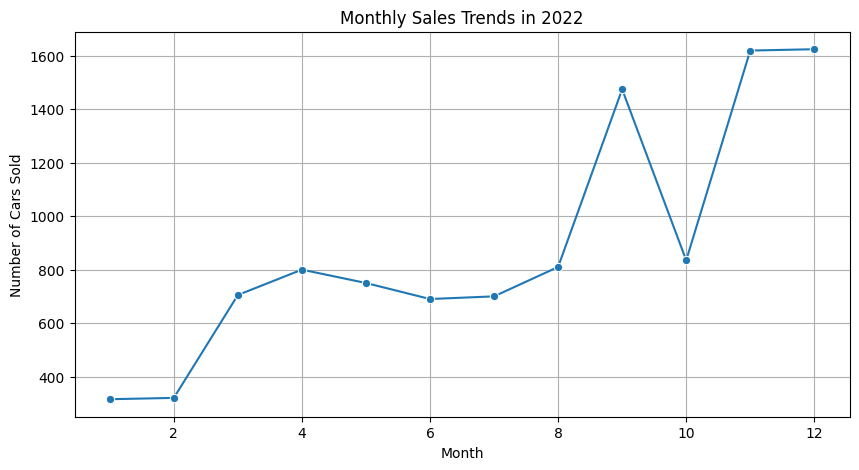

In [9]:
# Converting 'Date' column to datetime and extracting year, month, day of the week, and  make a season column based on data column
CarSales['Date'] = pd.to_datetime(CarSales['Date'])
CarSales['Year'] = CarSales['Date'].dt.year
CarSales['Month'] = CarSales['Date'].dt.month
CarSales['DayOfWeek'] = CarSales['Date'].dt.dayofweek
CarSales['Season'] = CarSales['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2] 
                                 else 'Spring' if x in [3, 4, 5] 
                                 else 'Summer' if x in [6, 7, 8] 
                                 else 'Fall')
# Filtering data for year 2022
df_2022 = CarSales[CarSales['Year'] == 2022]


# Monthly sales trend for 2022
monthly_sales = df_2022.groupby("Month")["Price ($)"].count()
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker="o")
plt.xlabel("Month")
plt.ylabel("Number of Cars Sold")
plt.title("Monthly Sales Trends in 2022")
plt.grid()
plt.show()

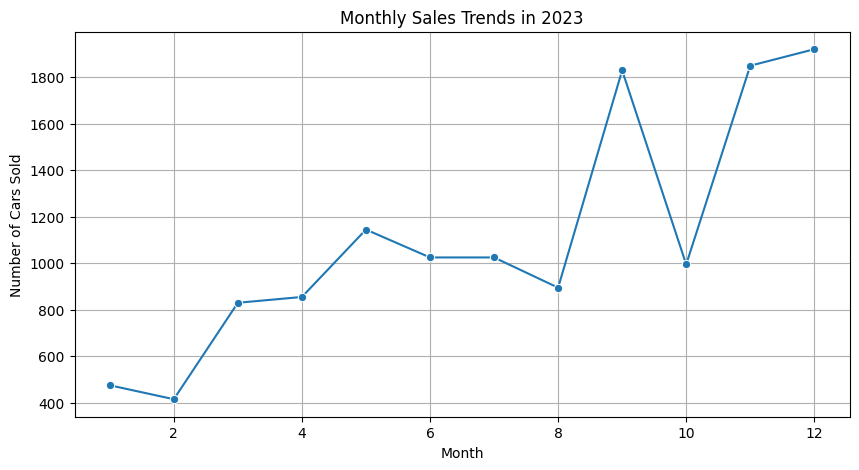

In [10]:
# Filtering data for year 2023
df_2023 = CarSales[CarSales['Year'] == 2023]

# Monthly sales trend for 2023
monthly_sales = df_2023.groupby("Month")["Price ($)"].count()
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker="o")
plt.xlabel("Month")
plt.ylabel("Number of Cars Sold")
plt.title("Monthly Sales Trends in 2023")
plt.grid()
plt.show()

### Five: Correlation Analysis

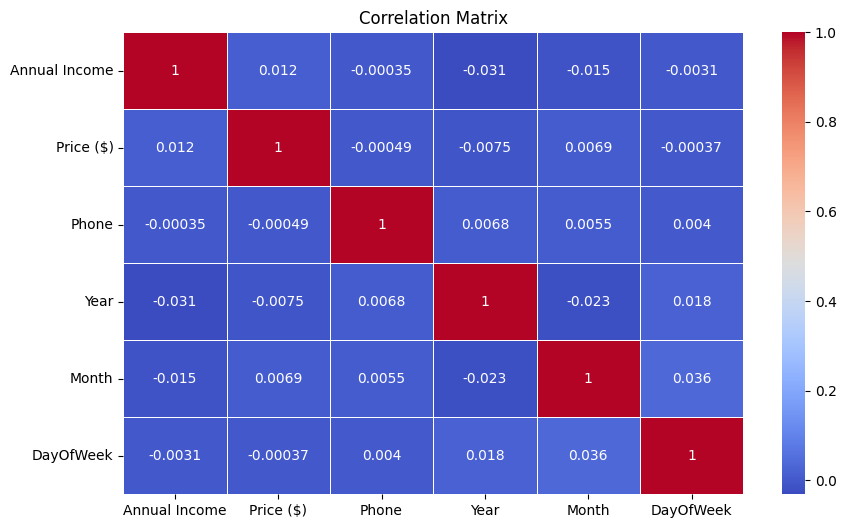

In [11]:
numeric = CarSales.select_dtypes(include=['number']) # filter out only numeric columns
correlation_matrix = numeric.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

-Converting 'Date' column to datetime and extracting year, month, day of the week.                                    
-Grouping months into seasons helps analyze seasonal patterns in sales, which is critical for forecasting.                                                  
-Focusing on a specific year (2022) and year (2023) narrows down the analysis and ensures you're examining recent trends or data relevant to your objective.    
-summarizes the total number of cars sold per month, making it easier to identify trends in monthly sales.                                                   
-extracts numeric columns, calculates correlations, and visualizes them in a heatmap to identify relationships between variables. It helps in feature selection, reducing redundancy, and understanding the dataset's structure for better predictive modeling.

# **Data Preprocessing and cleaning**

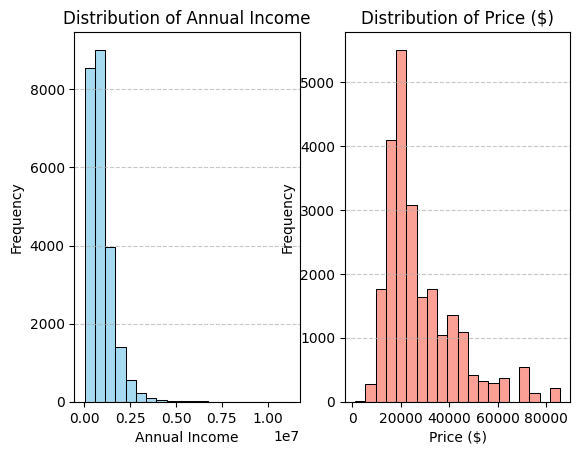

In [12]:
numerical_cols = CarSales.select_dtypes(include=["number"]).columns[:2]
# 1️⃣ First Histogram
plt.subplot(1, 2, 1)
sns.histplot(CarSales[numerical_cols[0]], bins=20,  color="skyblue")
plt.title(f"Distribution of {numerical_cols[0]}")
plt.xlabel(numerical_cols[0])
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# 2️⃣ Second Histogram
plt.subplot(1, 2, 2)
sns.histplot(CarSales[numerical_cols[1]], bins=20,  color="salmon")
plt.title(f"Distribution of {numerical_cols[1]}")
plt.xlabel(numerical_cols[1])
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot

plt.show()


In [13]:
numerical_data = CarSales['Price ($)']
stats = numerical_data.describe()
print(stats)

count    23906.000000
mean     28090.247846
std      14788.687608
min       1200.000000
25%      18001.000000
50%      23000.000000
75%      34000.000000
max      85800.000000
Name: Price ($), dtype: float64


In [14]:
Q1 = numerical_data.quantile(0.25)
Q2 = numerical_data.median()
Q3 = numerical_data.quantile(0.75)
IQR = Q3 - Q1
print(f"Q1: {Q1}")
print(f"Median (Q2):{Q2}")
print(f"Q3:{Q3}")
print(f"the IQR value: {IQR} " )
# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# define new column with outliers 
CarSales['Outlier'] = (CarSales["Price ($)"] < lower_bound) | (CarSales["Price ($)"] > upper_bound)

Q1: 18001.0
Median (Q2):23000.0
Q3:34000.0
the IQR value: 15999.0 


In [15]:
variance = numerical_data.var()
std_dev = numerical_data.std()
print(f"Variance:\n{variance}\n")
print(f"Standard Deviation:\n{std_dev}\n")
#test hypothesis
t_stat, p_value = ttest_1samp(CarSales['Price ($)'], 20000)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

Variance:
218705281.15977886

Standard Deviation:
14788.687607755424

T-Statistic: 84.58349941413661, P-Value: 0.0


## Removing Outliers on Annual Income

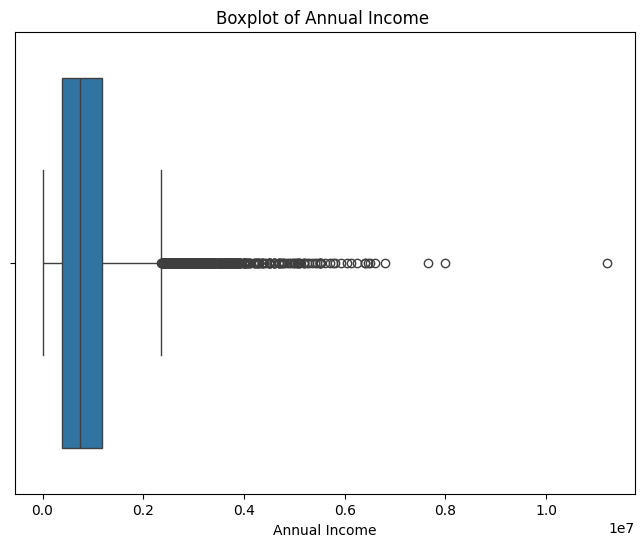

In [16]:
# Plot the boxplot again to check if outliers are removed
plt.figure(figsize=(8, 6))
sns.boxplot(x=CarSales["Annual Income"])
plt.title("Boxplot of Annual Income ")
plt.show()

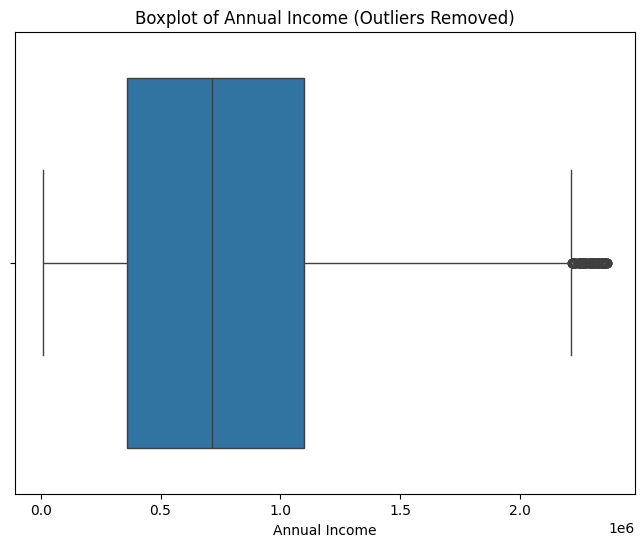

In [17]:
Q1 = CarSales["Annual Income"].quantile(0.25)
Q3 = CarSales["Annual Income"].quantile(0.75)
IQR = Q3 - Q1

# Define the acceptable range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
Car_sales_CleanData = CarSales[
    (CarSales["Annual Income"] >= lower_bound) & 
    (CarSales["Annual Income"] <= upper_bound)
]

# Plot the boxplot again to check if outliers are removed
plt.figure(figsize=(8, 6))
sns.boxplot(x=Car_sales_CleanData["Annual Income"])
plt.title("Boxplot of Annual Income (Outliers Removed)")
plt.show()


In [18]:
Car_sales_CleanData.shape

(23090, 20)

Handling missing values 

In [19]:
print(Car_sales_CleanData['Customer Name'].isnull().sum())


1


In [20]:
Car_sales_CleanData['Customer Name'].fillna('Unknown', inplace=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_21204\1825981472.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Car_sales_CleanData['Customer Name'].fillna('Unknown', inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_21204\1825981472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Car_sales_CleanData['Customer Name'].fillna('Unknown

check for duplicates 

In [21]:
duplicates = Car_sales_CleanData.duplicated().sum()
print(f'Total duplicates before removal: {duplicates}')

Total duplicates before removal: 0


In [22]:
# Remove duplicates
Car_sales_CleanData.drop_duplicates(inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_21204\4155212116.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Car_sales_CleanData.drop_duplicates(inplace=True)


In [23]:
duplicates_after = Car_sales_CleanData.duplicated().sum()
print(f'Total duplicates after removal: {duplicates_after}')

Total duplicates after removal: 0


In [24]:
Car_sales_CleanData = Car_sales_CleanData.drop(columns=['Outlier'])

## **Engineer time-based features** 

In [25]:
# Calculate total sales by year
sales_by_year = Car_sales_CleanData.groupby('Year')['Price ($)'].sum().reset_index()

# Create a table for highest sales by year, month, day of the week, and season
highest_sales_per_year = []

for year in sales_by_year['Year']:
    year_CarSales = CarSales[CarSales['Year'] == year]
    
    # Calculate total sales by month for the current year
    sales_by_month = year_CarSales.groupby('Month')['Price ($)'].sum().reset_index()
    highest_sales_month = sales_by_month.loc[sales_by_month['Price ($)'].idxmax()]
    
    # Calculate total sales by day of the week for the current year
    sales_by_week = year_CarSales.groupby('DayOfWeek')['Price ($)'].sum().reset_index()
    highest_sales_day = sales_by_week.loc[sales_by_week['Price ($)'].idxmax()]
    
    # Calculate total sales by season for the current year
    sales_by_season = year_CarSales.groupby('Season')['Price ($)'].sum().reset_index()
    highest_sales_season = sales_by_season.loc[sales_by_season['Price ($)'].idxmax()]
    
    # Add the highest sales for each category for this year to the list
    highest_sales_per_year.append({
        'Year': year,
        'Highest Sales Month': highest_sales_month['Month'],
        'Month Sales ($)': highest_sales_month['Price ($)'],
        'Highest Sales Day': highest_sales_day['DayOfWeek'],
        'Day Sales ($)': highest_sales_day['Price ($)'],
        'Highest Sales Season': highest_sales_season['Season'],
        'Season Sales ($)': highest_sales_season['Price ($)']
    })

# Convert the list to a CarSalesFrame
highest_sales_df = pd.DataFrame(highest_sales_per_year)

# Display the table
print(highest_sales_df)

   Year  Highest Sales Month  Month Sales ($)  Highest Sales Day  \
0  2022                   11         45389290                  6   
1  2023                   12         54281601                  4   

   Day Sales ($) Highest Sales Season  Season Sales ($)  
0       56784272                 Fall         111599015  
1       68756406                 Fall         131051106  


Save the cleaned DataFrame to a new CSV file

In [26]:
Car_sales_CleanData.to_csv('../Data/Car_sales_CleanData.csv', index=False)

print("Cleaned data saved to 'Car_sales_CleanData.csv'.")

Cleaned data saved to 'Car_sales_CleanData.csv'.


-checks for missing values in each column and prints the counts.                                               
-The code identifies and counts duplicate rows before removal,Duplicates are removed, and the count is checked again to confirm removal.                     
-calculates total sales by year and displays the result.                                                                  
-the cleaned DataFrame is saved to a new CSV file named Car_sales_CleanData.

## **Finally: Check data after cleaning step**

In [27]:
Car_sales_CleanData = pd.read_csv('../Data/Car_sales_CleanData.csv', index_col=0)
print(Car_sales_CleanData.info())
print(Car_sales_CleanData.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 23090 entries, 2022-01-02 to 2023-12-31
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer Name  23090 non-null  object
 1   Gender         23090 non-null  object
 2   Annual Income  23090 non-null  int64 
 3   Dealer_Name    23090 non-null  object
 4   Company        23090 non-null  object
 5   Model          23090 non-null  object
 6   Engine         23090 non-null  object
 7   Transmission   23090 non-null  object
 8   Color          23090 non-null  object
 9   Price ($)      23090 non-null  int64 
 10  Dealer_No      23090 non-null  object
 11  Body Style     23090 non-null  object
 12  Phone          23090 non-null  int64 
 13  Dealer_Region  23090 non-null  object
 14  Year           23090 non-null  int64 
 15  Month          23090 non-null  int64 
 16  DayOfWeek      23090 non-null  int64 
 17  Season         23090 non-null  object
dtypes: int64(6), obje

In [28]:
Car_sales_CleanData.head()

,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Year,Month,DayOfWeek,Season
Date,,,,,,,,,,,,,,,,,,
2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown,2022,1,6,Winter
2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora,2022,1,6,Winter
2022-01-02,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville,2022,1,6,Winter
2022-01-02,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco,2022,1,6,Winter
2022-01-02,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville,2022,1,6,Winter


In [29]:
print(Car_sales_CleanData.isnull().sum()) 


Customer Name    0
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
Year             0
Month            0
DayOfWeek        0
Season           0
dtype: int64


# **Some Visualizations for data** 

 The Data now ready for compelet analysis 

C:\Users\DELL\AppData\Local\Temp\ipykernel_21204\2221056251.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dealer_counts.index, y=dealer_counts.values, palette='viridis')


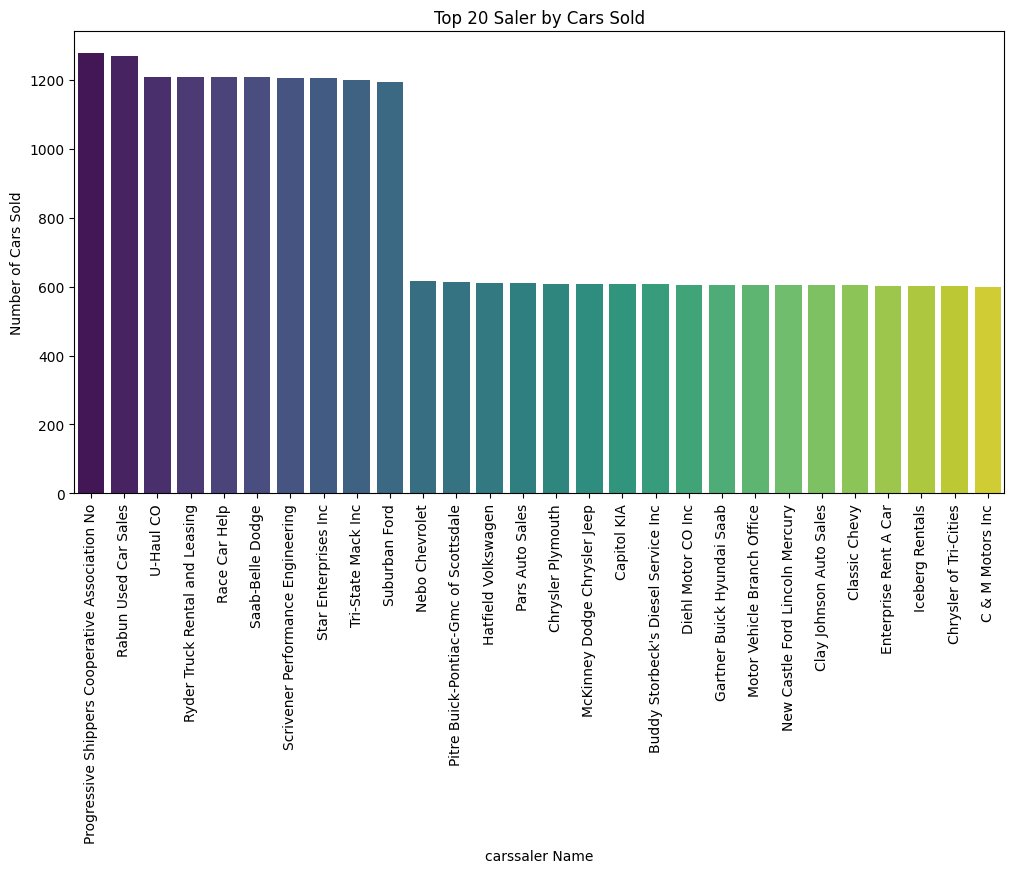

In [30]:
# Count number of sales per dealer
dealer_counts = Car_sales_CleanData['Dealer_Name'].value_counts()
# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x=dealer_counts.index, y=dealer_counts.values, palette='viridis')
# Labels and title
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.xlabel("carssaler Name")
plt.ylabel("Number of Cars Sold")
plt.title("Top 20 Saler by Cars Sold")

plt.show()


In [31]:
# Count number of cars sold for each Dealer-Company pair
dealer_company_sales = Car_sales_CleanData.groupby(["Dealer_Name", "Company"]).size().reset_index(name="Sales")

# Display first few rows to verify the structure
print(dealer_company_sales.head(10))


                           Dealer_Name    Company  Sales
0  Buddy Storbeck's Diesel Service Inc      Acura     24
1  Buddy Storbeck's Diesel Service Inc       Audi     14
2  Buddy Storbeck's Diesel Service Inc        BMW     24
3  Buddy Storbeck's Diesel Service Inc      Buick     10
4  Buddy Storbeck's Diesel Service Inc   Cadillac     21
5  Buddy Storbeck's Diesel Service Inc  Chevrolet     48
6  Buddy Storbeck's Diesel Service Inc   Chrysler     31
7  Buddy Storbeck's Diesel Service Inc      Dodge     44
8  Buddy Storbeck's Diesel Service Inc       Ford     38
9  Buddy Storbeck's Diesel Service Inc      Honda     16


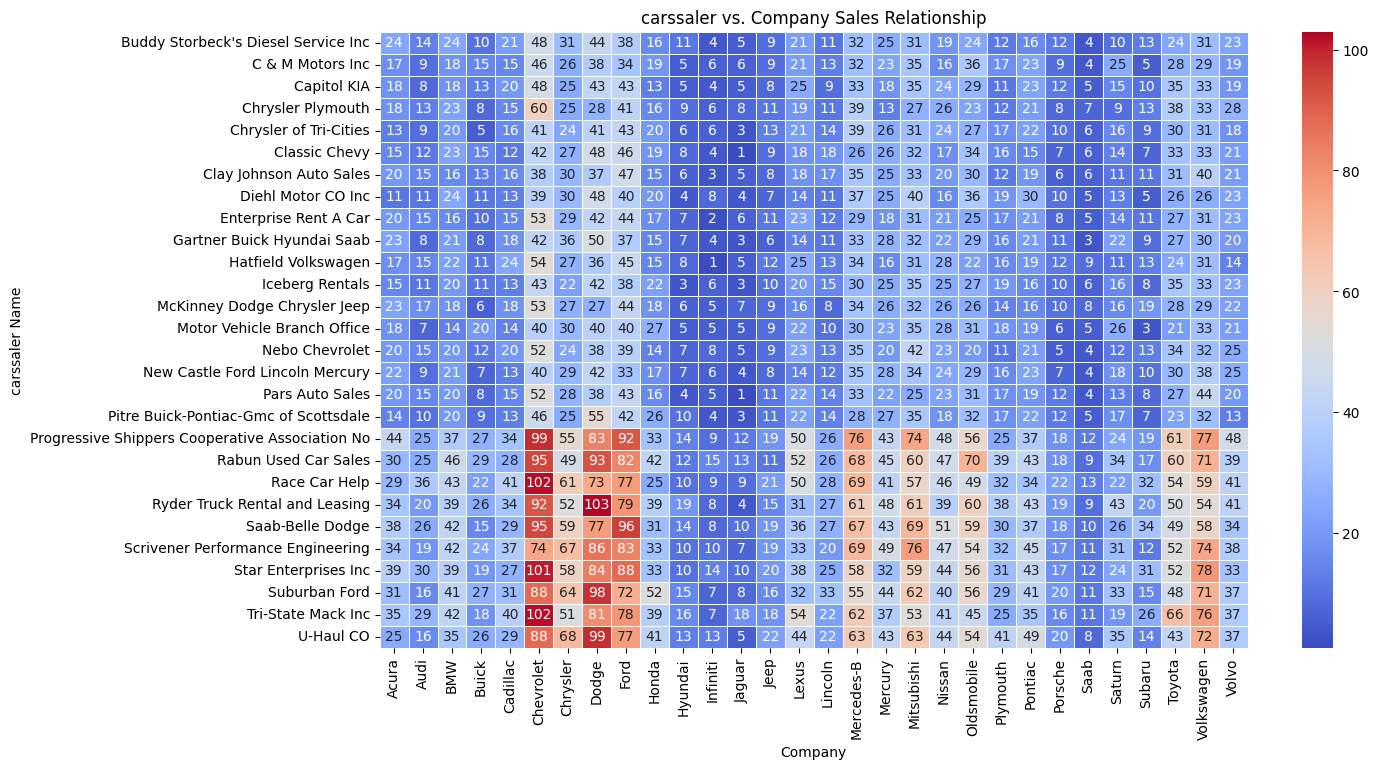

In [32]:
plt.figure(figsize=(14, 8))

# Pivot the table for heatmap
dealer_company_pivot = dealer_company_sales.pivot(index="Dealer_Name", columns="Company", values="Sales")
# Plot the heatmap
sns.heatmap(dealer_company_pivot, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)
# Formatting
plt.xticks(rotation=90)  # Rotate company names
plt.yticks(rotation=0)   # Keep dealer names readable
plt.xlabel("Company")
plt.ylabel("carssaler Name")
plt.title("carssaler vs. Company Sales Relationship")
plt.savefig("../Images/heatmap.png", bbox_inches="tight")
plt.show()


In [33]:
# Group data by Dealer_Name
dealer_sales = Car_sales_CleanData.groupby("Dealer_Name").agg({"Price ($)": "sum", "Company": "count"}).reset_index()
# Rename columns for clarity
dealer_sales.rename(columns={"Price ($)": "Total Sales ($)", "Company": "Total Cars Sold"}, inplace=True)
# Display first few rows
print(dealer_sales.head(10))


                           Dealer_Name  Total Sales ($)  Total Cars Sold
0  Buddy Storbeck's Diesel Service Inc         16533512              607
1                     C & M Motors Inc         16805338              598
2                          Capitol KIA         17056025              607
3                    Chrysler Plymouth         16720401              608
4               Chrysler of Tri-Cities         16731398              601
5                        Classic Chevy         17235047              604
6              Clay Johnson Auto Sales         16873043              604
7                   Diehl Motor CO Inc         16914605              606
8                Enterprise Rent A Car         16968255              603
9           Gartner Buick Hyundai Saab         17149199              606


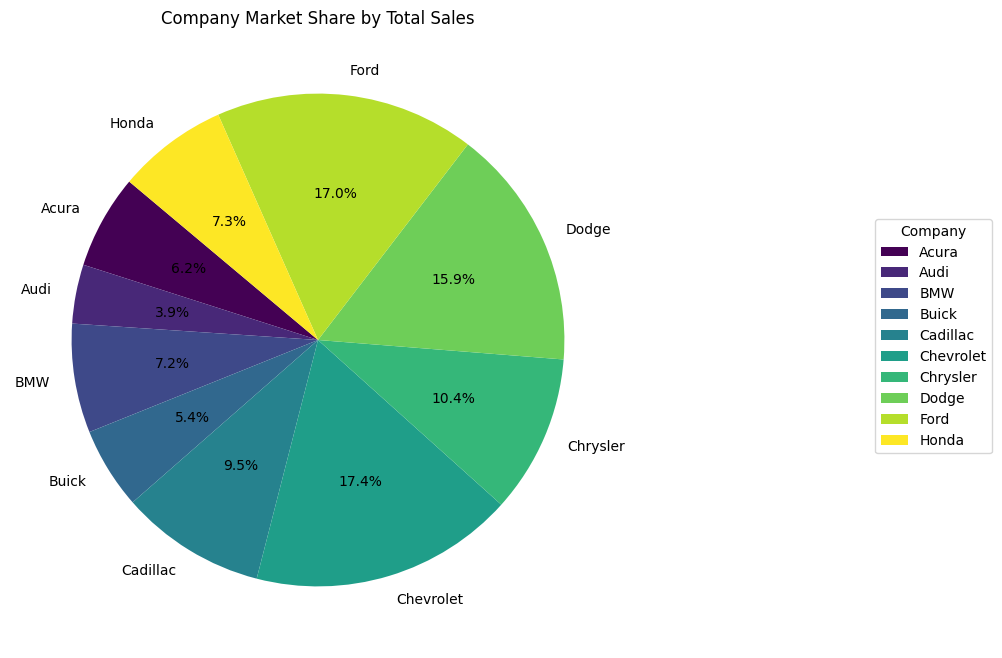

In [34]:
company_sales = Car_sales_CleanData.groupby("Company")["Price ($)"].sum().head(10)

plt.figure(figsize=(8, 8))
company_sales.plot.pie(autopct="%1.1f%%", cmap="viridis", startangle=140)
plt.ylabel("")
plt.title("Company Market Share by Total Sales")
plt.legend(title="Company", bbox_to_anchor=(1.2, 0.5), loc="center left", bbox_transform=plt.gcf().transFigure)
plt.savefig("../Images/company_market_share.png", bbox_inches="tight")
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_21204\1143019359.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=Car_sales_CleanData, x="Company", y="Price ($)", palette="Set2")


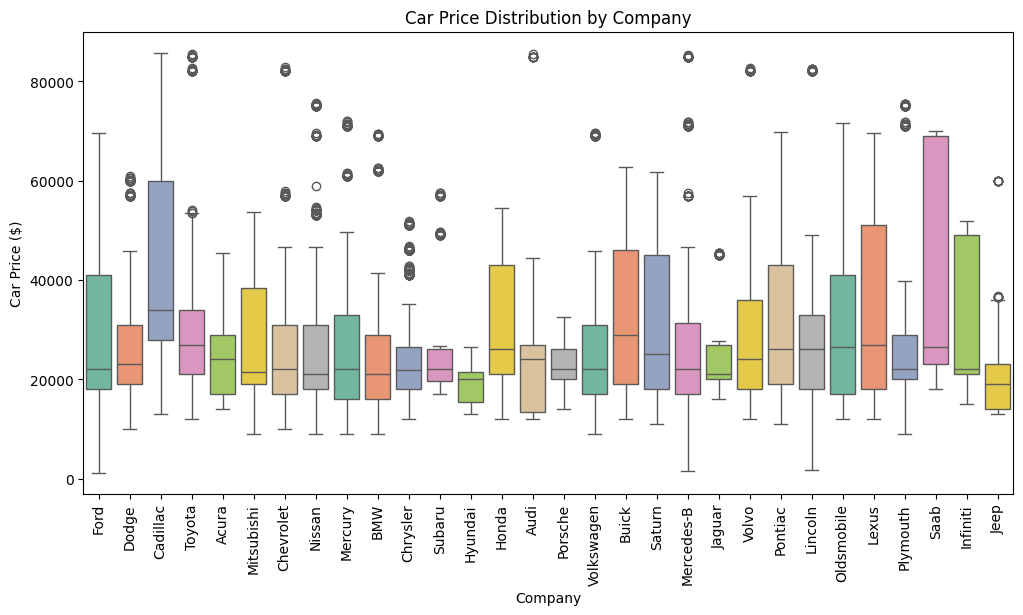

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=Car_sales_CleanData, x="Company", y="Price ($)", palette="Set2")
plt.xticks(rotation=90)
plt.xlabel("Company")
plt.ylabel("Car Price ($)")
plt.title("Car Price Distribution by Company")
plt.show()


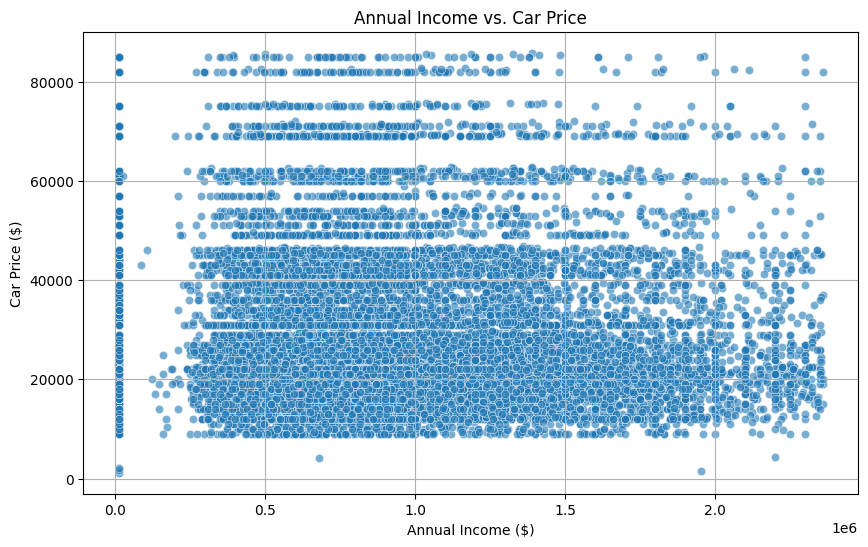

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Car_sales_CleanData, x="Annual Income", y="Price ($)", alpha=0.6)
plt.xlabel("Annual Income ($)")
plt.ylabel("Car Price ($)")
plt.title("Annual Income vs. Car Price")
plt.grid(True)
plt.show()


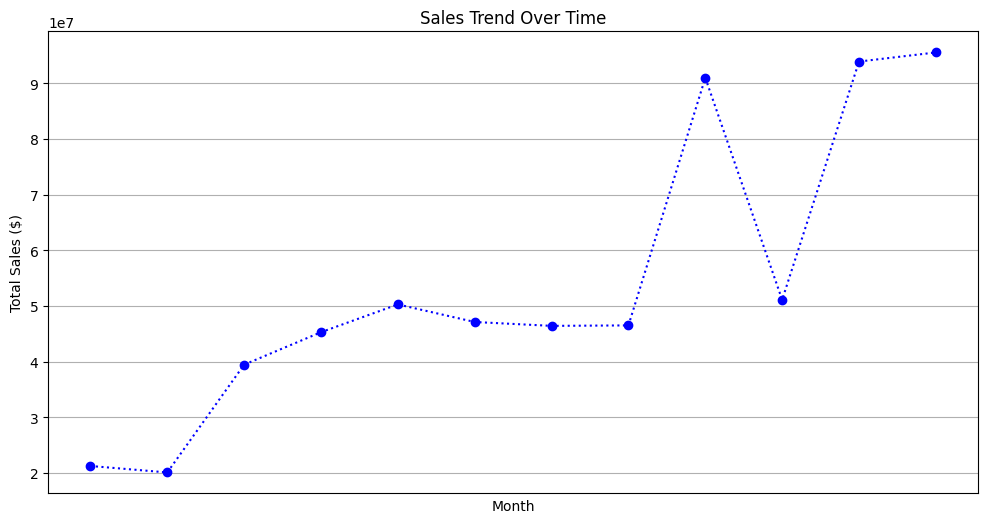

In [37]:
Car_sales_CleanData["Month"] = pd.to_datetime(Car_sales_CleanData["Month"])
time_series = Car_sales_CleanData.groupby("Month")["Price ($)"].sum()
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(time_series.index, time_series, marker="o", linestyle=":", color="b")
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.title("Sales Trend Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig("../Images/time_series.png")
plt.show()


# conclusion

`Annual Income`:
* The average annual income is 830,840.
* The income ranges from minimum of 10,080 to a maximum of 11,200,000.
* The average income is notably high, indicating a potential skew towards affluent individuals.
* The large standard deviation of 720,006 suggests considerable variation in income levels.
* Such data raises questions about the distribution of the dataset and may indicate a presence of outliers.
* Further investigation is needed to understand the income dynamics within the dataset.

`Price`:
* The average car price is 28,090.
* The price ranges from a minimum of 1,200 to a maximum of 85,800.
* The price column shows a wide range of car prices, with the majority of cars priced around the median of $23,000, indicating a mix of mid-range and high-end vehicles.

---

# **Findings Overview**
* The analysis highlights strong regional sales patterns and significant seasonality in the data, with noticeable sales peaks in specific months, particularly September and November.
* Chevrolet, Ford, and Dodge emerge as the dominant car brands across all regions, while Hyundai, Saab, and Jaguar lag in popularity, suggesting a potential need for strategic reevaluation by less popular brands.
* Engine and transmission preferences are quite balanced, with a slight inclination towards automatic transmissions and dual overhead camshaft engines, though the difference is not drastic.
* Pale White is the most popular color choice, potentially due to easier maintenance, followed by Black. Red is the least preferred, indicating a more conservative color preference among customers.
* SUVs and Hatchbacks are the most favored body styles, with Sedans trailing behind, revealing a market preference for larger, more versatile vehicles.

#


<head>
    <title>Team Credits</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            background-color:rgba(23, 20, 20, 0.74);
            margin: 0;
            padding: 0;
            display: flex;
            justify-content: center;
            align-items: center;
            min-height: 100vh;
        }
        .container {
            text-align: center;
            background-color:rgb(44, 130, 183);
            padding: 40px;
            border-radius: 10px;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
            max-width: 1100px;
            width: 100%;
        }
        h1 {
            color: #333;
            font-size: 2.5em;
            margin-bottom: 10px;
        }
        h3 {
            color: #333;
            font-size: 1.5em;
            margin: 20px 0;
        }
        ul {
            list-style: none;
            padding: 0;
            margin: 20px 0;
        }
        ul li {
            font-size: 1.2em;
            margin: 10px 0;
        }
        ul li a {
            color: #333;
            text-decoration: none;
            transition: color 0.3s;
        }
        ul li a:hover {
            color: #007bff;
        }
        .github-section {
            margin-top: 30px;
        }
        .github-section p {
            color: #333;
            font-size: 1.1em;
            margin-bottom: 10px;
        }
        .github-section a img {
            width: 50px;
            height: 50px;
            transition: transform 0.3s;
        }
        .github-section a img:hover {
            transform: scale(1.1);
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>Thank You for Your Time and Efforts!</h1>
        <h3>This Work Done By Our Team:</h3>
        <ul>
            <li><a href="https://github.com/youssef-113" target="_blank">Youssef Bassiony Abdlah</a></li>
            <li><a href="https://github.com/AhmedGamall-1" target="_blank">Ahmed Gamall</a></li>
            <li><a href="https://github.com/Begad" target="_blank">Begad Abdelghafar</a></li>
            <li><a href="https://github.com/MustafaNasser005" target="_blank">Mustafa Nasser</a></li>
            <li><a href="https://github.com/mohamedamr21c" target="_blank">Mohammed Amr </a></li>
        </ul>
        <div class="github-section">
            <p>For GitHub Repository</p>
            <a href="https://github.com/AhmedGamall-1/Sales-forcasting-and-optmization/tree/main" title="Redirect to GitHub" target="_blank">
                <img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png" alt="GitHub">
            </a>
        </div>

</body>
